In [5]:
"""
Testing design of m4D2 with AF3, ProteinMPNN, Rosetta, MDMin, and BioDC
Heme redox potential from lit: -0.118
Heme redox potential literature range: -0.750, –0.250, +0.050, +0.450
Heme redox potential predicted: -0.298
Heme redox potential aimed: -0.950, -0.550, -0.150, 0.250
""" 

FOLDER_HOME = '250402_m4d2_m150mV'

import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *

# GENERAL SETTINGS FOR AI.zymes ---------------------------------------------------------------------------------------
AIzymes = AIzymes_MAIN()
AIzymes.setup(FOLDER_HOME = FOLDER_HOME,
  FOLDER_PARENT     = 'parent',
  MAX_JOBS          = 72,
  MAX_GPUS          = 4,
  MEMORY            = 450,
  N_PARENT_JOBS     = 144,
  MAX_DESIGNS       = 10000,
  KBT_BOLTZMANN     = [1., 0.1, 0.02],
  WT                = "m4d2",
  LIGAND            = "HEM",
  DESIGN            = "13,16,17,20,21,23,24,28,34,37,38,41,44,71,74,75,78,79,81,82,92,93,95,96,99,102",
  RESTRICT_RESIDUES = [[37,'H'],[95,'H']],
  SYSTEM            = "RAVEN",
  EXPLORE           = False,
  RUN_PARALLEL      = True,
  TARGET_REDOX      = -0.15,
  SUBMIT_PREFIX     = "m150", 
  PARENT_DES_MED    = ['RosettaDesign','AlphaFold3INF','MDMin','RosettaRelax','BioDC'],
  DESIGN_METHODS    = [[0.7,'SolubleMPNN','AlphaFold3INF','MDMin','RosettaRelax','BioDC'],\
                       [0.3,'RosettaDesign','AlphaFold3INF','MDMin','RosettaRelax','BioDC']],
  SCORING_METHODS   = [], 
  SELECTED_SCORES   = ["total","interface","redox"],  
 )

2025-04-02 10:56:57 - INFO - Job will be run in PARALLEL mode with 72 cpus. It is recommended to set N_PARENT_JOBS to at least 144.
2025-04-02 10:56:57 - INFO - Add a chheck here for GPU request, failing if GPUs are requested wrongly!


Do you really want to restart AIzymes from scratch? 
    This will delete all existing files in /raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV [y/n]

     y


2025-04-02 10:57:15 - INFO - Running AI.zymes setup.
2025-04-02 10:57:15 - INFO - Content of /raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV deleted.
2025-04-02 10:57:15 - INFO - Happy AI.zymeing! :)


In [6]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
FOLDER_HOME = '250402_m4d2_m150mV'
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME = FOLDER_HOME, LOG="debug", PRINT_VAR=False) 
AIzymes.submit_controller()

2025-04-02 10:57:21 - INFO - Starting parallel controller.


In [4]:
!squeue --me      
#FOLDER_HOME = '250401_m4d2_BioDC_Target_m550'
#!tail -n 10 {FOLDER_HOME}/controller.log

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          16708315       gpu m150_con  bunzela PD       0:00      1 (Resources)
          16708316       gpu m950_con  bunzela PD       0:00      1 (Priority)
          16708317       gpu m550_con  bunzela PD       0:00      1 (Priority)
          16708304       gpu p250_con  bunzela  R       1:04      1 ravg1192


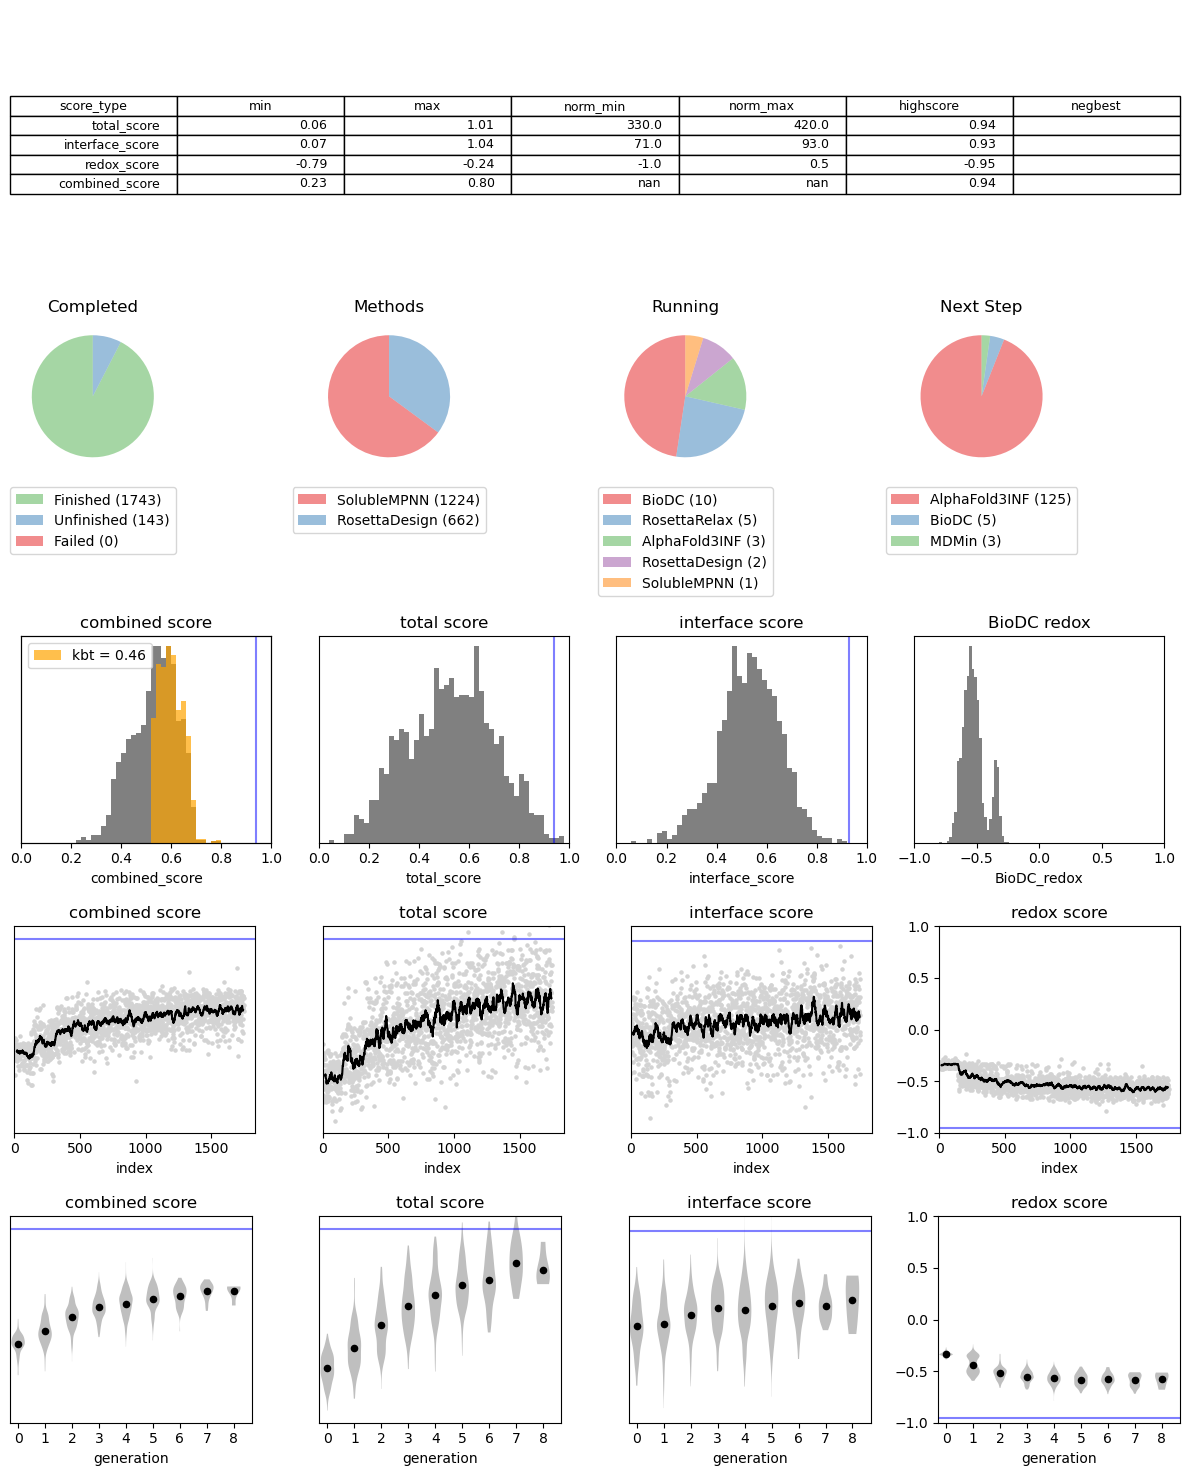

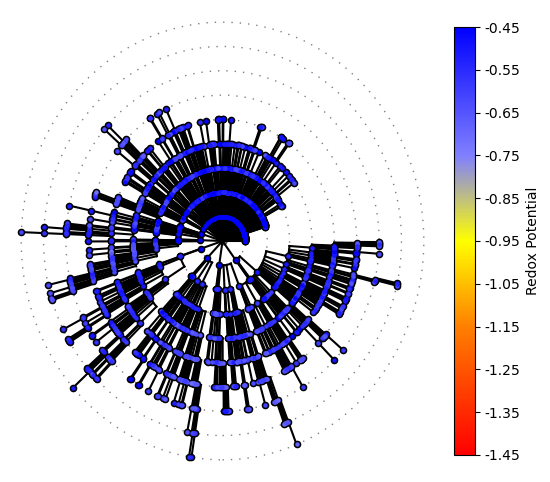

In [10]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
FOLDER_HOME = '250401_m4d2_BioDC_Target_m950'
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME=FOLDER_HOME)
AIzymes.plot(STATISTICS=True, 
             SCORES_HIST=True,
             SCORES_V_INDEX=True, 
             SCORES_V_GEN=True,
             PLOT_TREE=True,
             RESOURCE_LOG=False,
             TREE_SCORE="BioDC_redox",
             NORM = {
                'total_score': [330, 420], 
                'interface_score': [71, 93],
                'redox_score': [-1.0, 0.5],
             },
             HIGHSCORE = {
                'total_score': 0.94, 
                'interface_score': 0.93,
                'combined_score': 0.94,
                'redox_score': -0.95,
             },
             PRINT_VALS=True)

In [ ]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
FOLDER_HOME = '250401_m4d2_BioDC_Target_1'
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME=FOLDER_HOME)
AIzymes.best_structures()

In [5]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 4)  
file_path = f"{FOLDER_HOME}/all_scores.csv"
df = pd.read_csv(file_path)

print("All Designs:                ",len(df))
print("Designs with total_score:   ",df["total_score"].notna().sum())
print("Designs without total_score:",df["total_score"].isna().sum())

display(df)
pd.set_option("display.max_rows", None)
display(df[df["total_score"].isna()][['design_method', 'blocked', 'next_steps']])

index=1000
print()
pd.set_option("display.max_rows", None)
display(df.iloc[index])
pd.set_option("display.max_rows", 4)

All Designs:                 144
Designs with total_score:    0
Designs without total_score: 144


,sequence,parent_index,generation,total_mutations,parent_mutations,score_taken_from,design_method,blocked,next_steps,final_variant,input_variant,previous_input_variant_for_reset,step_input_variant,step_output_variant,total_potential,total_score,design_total_score,relax_total_score,interface_potential,interface_score,design_interface_score,relax_interface_score,redox_potential,redox_score,design_redox_score,relax_redox_score,kbt_boltzmann,cst_weight,luca,cat_resi,identical_score,identical_potential,active_site_res
0,GSPELREKLRALLEQVYATGQEMLKNTVNSPELLEKHVALAEQVYATWQELLKNGSVSPSPELREKFRALLEQVIATGQELMKNTSNSPELLEKHRALAEQLIATWQELLKN,Parent,0,9.0,9.0,NaN,RosettaDesign,MDMin,"RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/0/m4d2_RosettaRelax_0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/0/m4d2_RosettaDesign_0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/0/m4d2_AlphaFold3INF_0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/0/m4d2_MDMin_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,NaN,0.0,0.0,EYAQELKNEVAEYEIAQEMKEKRAEI
1,GSPELREKLRALIEQVYATGQEMLKNTVNSPELMEKHVALAEQVYATWQELLKNGSVSPSPELREKFRALLEQVFATGQELLKNTSNSPELMEKHRALAEQLIATWQELLKN,Parent,0,7.0,7.0,NaN,RosettaDesign,MDMin,"RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/1/m4d2_RosettaRelax_1,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/1/m4d2_RosettaDesign_1,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/1/m4d2_AlphaFold3INF_1,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/1/m4d2_MDMin_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,NaN,0.0,0.0,EYAQELKNEVAEYEFAQELKEKRAEI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,RosettaDesign,"AlphaFold3INF,MDMin,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/142/m4d2_RosettaRelax_142,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/142/m4d2_RosettaDesign_142,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/142/m4d2_RosettaDesign_142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,NaN,0.0,0.0,NaN
143,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,RosettaDesign,"AlphaFold3INF,MDMin,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/143/m4d2_RosettaRelax_143,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/143/m4d2_RosettaDesign_143,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/designs/143/m4d2_RosettaDesign_143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,/raven/u/bunzela/AIzymes/design/HAB/250402_m4d2_m150mV/parent/m4d2,NaN,0.0,0.0,NaN


,design_method,blocked,next_steps
0,RosettaDesign,MDMin,"RosettaRelax,BioDC"
1,RosettaDesign,MDMin,"RosettaRelax,BioDC"
2,RosettaDesign,AlphaFold3INF,"MDMin,RosettaRelax,BioDC"
3,RosettaDesign,AlphaFold3INF,"MDMin,RosettaRelax,BioDC"
4,RosettaDesign,AlphaFold3INF,"MDMin,RosettaRelax,BioDC"
5,RosettaDesign,AlphaFold3INF,"MDMin,RosettaRelax,BioDC"
6,RosettaDesign,unblocked,"AlphaFold3INF,MDMin,RosettaRelax,BioDC"
7,RosettaDesign,unblocked,"AlphaFold3INF,MDMin,RosettaRelax,BioDC"
8,RosettaDesign,unblocked,"AlphaFold3INF,MDMin,RosettaRelax,BioDC"
9,RosettaDesign,unblocked,"AlphaFold3INF,MDMin,RosettaRelax,BioDC"


IndexError: single positional indexer is out-of-bounds